## sprawdzenie na ile rysunki są niedeterministyczne

In [9]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from keras.datasets import mnist
import math
import os

In [6]:
from es.draw_multiple import Drawer

def data_mnist():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
    X_test = X_test.astype('float32')
    X_test /= 255
    return X_test

config = {"alpha": 0.8, "background": "00", "rewards": "mse", "channels": 1}
N = 20

def test():
    mnist = data_mnist()
    index = np.random.choice(10000)
    sample = mnist[index].reshape(1, mnist.shape[1], mnist.shape[2], mnist.shape[3])
    
    fig = plt.figure(figsize=(16,3))
    fig.suptitle(f'n = {N}')
                
    rows = 1
    cols = 6
    
    drawer = Drawer(**config)
    
    for i in range(6):
        result = drawer.draw(images=sample, n=N)
                 
        plt.subplot(rows, cols, i+1)
        plt.axis('off')
        plt.imshow(result.reshape(28, 28), cmap='gray')
    
    plt.show()

ModuleNotFoundError: No module named 'es.draw_multiple'

100%|██████████| 1/1 [00:05<00:00,  5.02s/it]


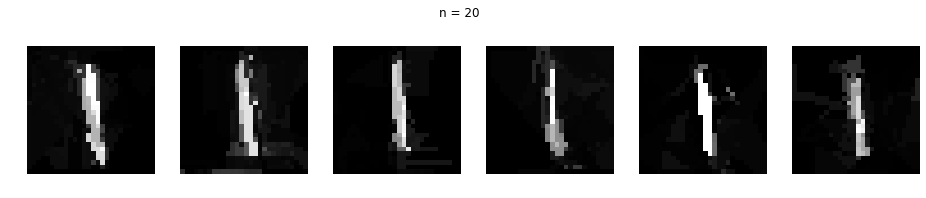

In [9]:
test()

100%|██████████| 1/1 [00:05<00:00,  5.89s/it]


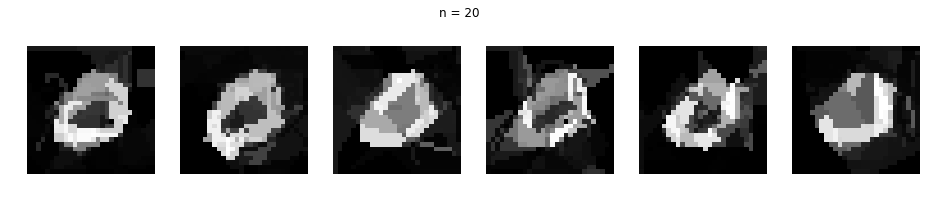

In [3]:
test()

100%|██████████| 1/1 [00:04<00:00,  4.42s/it]


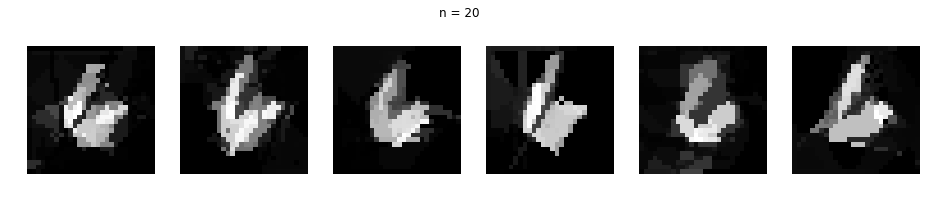

In [4]:
test()

100%|██████████| 1/1 [00:05<00:00,  5.04s/it]


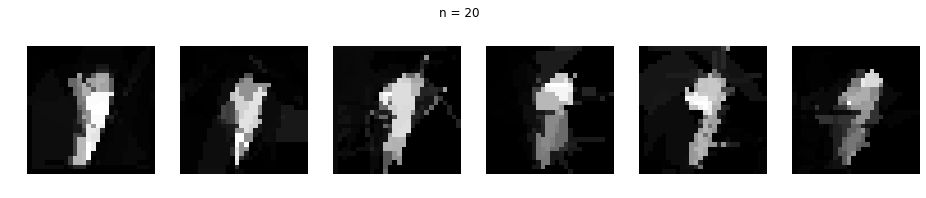

In [5]:
test()

100%|██████████| 1/1 [00:06<00:00,  6.49s/it]


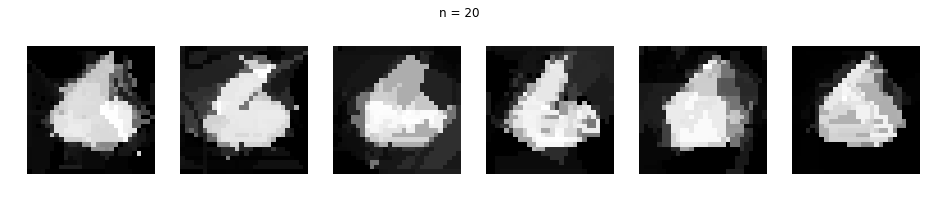

In [6]:
test()

100%|██████████| 1/1 [00:06<00:00,  6.46s/it]


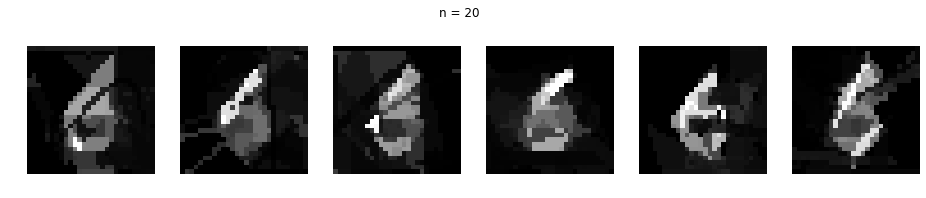

In [7]:
test()

Widać, że dla n = 20 wyniki są różne.

## Datasety

In [73]:
BASE = '/Users/mchrusci/uj/shaper_data/augmentation'

def plot_dataset(n, augmented):
    suffix = '-augmented-10' if augmented else ''
    dataset = f'mnist-{n}{suffix}.npz'
    
    with np.load(os.path.join(BASE, dataset)) as data:
        X = data['drawings'] if augmented else data['drawings'] 
    
    N = X.shape[0]
    
    if N > 100:
        idxs = np.random.choice(N, 100)
        N = 100
    else:
        idxs = np.arange(N)
        
    root = int(math.sqrt(N))
    
    while N % root != 0:
        root -= 1
    
    cols = N // root
    rows = root
    
    fig = plt.figure(figsize=(5,5))
    
    for r in range(rows):
        for c in range(cols):
            img = X[idxs[c*rows+r]]
            plt.subplot(rows, cols, c*rows+r+1)
            plt.axis('off')
            plt.imshow(img.reshape(28, 28), cmap='gray')
    
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

### MNIST 10

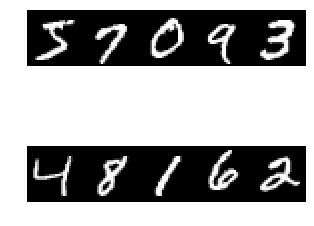

In [60]:
plot_dataset(10, augmented=False)

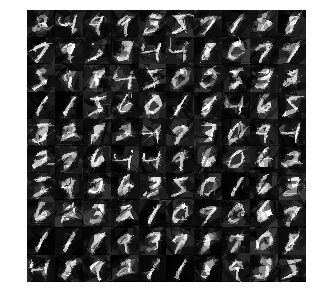

In [61]:
plot_dataset(10, augmented=True)

### MNIST 100

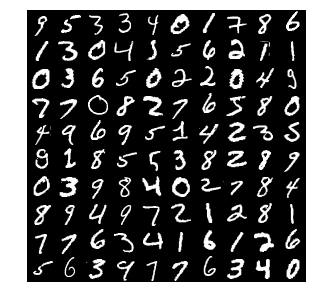

In [62]:
plot_dataset(100, augmented=False)

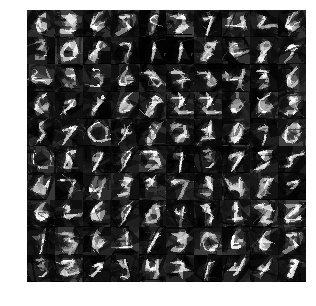

In [63]:
plot_dataset(100, augmented=True)

### MNIST 1000

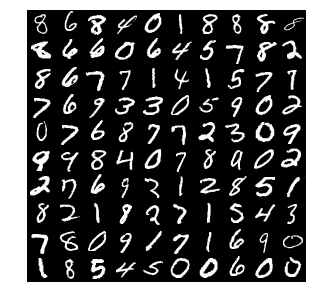

In [47]:
plot_dataset(1000, augmented=False)

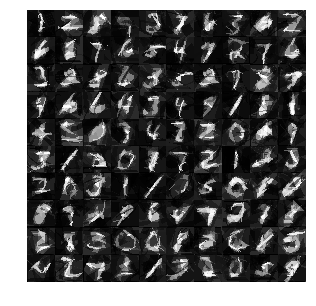

In [48]:
plot_dataset(1000, augmented=True)

### Test

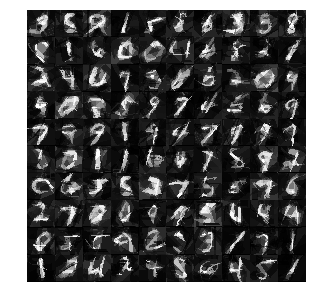

In [51]:
plot_dataset('test-20', augmented=False)

Model A, n = 20

| dataset    | MNIST MNIST | A-MNIST MNIST | A-MNIST A-MNIST | MNIST A-MNIST |
|------------|-------------|---------------|-----------------|---------------|
| MNIST 10   | 47.84%      | 45.63%        | **47.99%**      | 45.35%        |
| MNIST 100  | 75.68%      | **76.89%**    | 73.73%          | 69.48%        |
| MNIST 1000 | 94.43%      | 94.23%        | 87.97%          | 82.44%        |
| MNIST 60000| 99.14%      | -             | -               | 84.75%        |

### MNIST 10

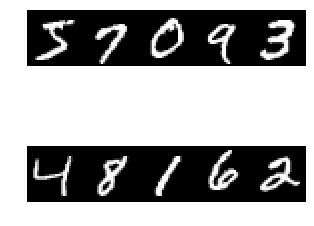

In [65]:
plot_dataset(10, augmented=False)

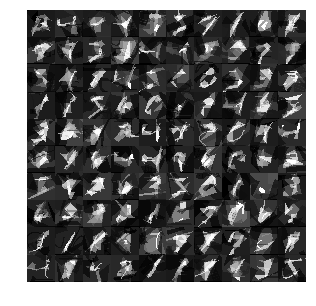

In [66]:
plot_dataset(10, augmented=True)

### MNIST 100

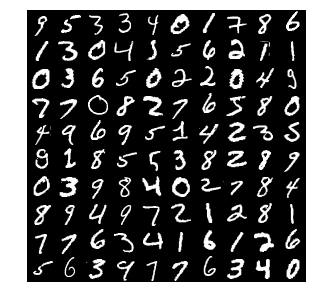

In [67]:
plot_dataset(100, augmented=False)

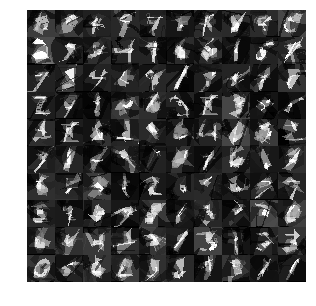

In [69]:
plot_dataset(100, augmented=True)

### MNIST 1000

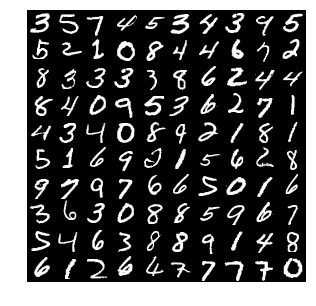

In [70]:
plot_dataset(1000, augmented=False)

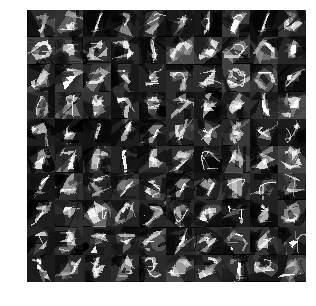

In [71]:
plot_dataset(1000, augmented=True)

### Test

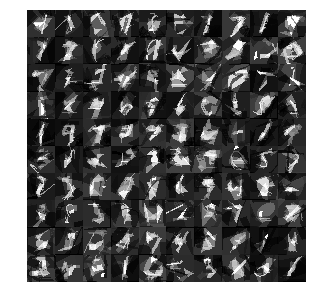

In [74]:
plot_dataset('test-10', augmented=False)

Model A, n = 10

| dataset    | MNIST MNIST | A-MNIST MNIST | A-MNIST A-MNIST | MNIST A-MNIST |
|------------|-------------|---------------|-----------------|---------------|
| MNIST 10   | 47.84%      | **49.7%**     | 44.48%          | 40.89%        |
| MNIST 100  | 75.68%      | 75.1%         | 65.24%          | 60.61%        |
| MNIST 1000 | 94.43%      | 93.3%         | 74.35%          | 68.3%         |
| MNIST 60000| 99.14%      | -             | -               | 56%           |